<a href="https://colab.research.google.com/github/NehaKumari500092077/Visual-Computing/blob/main/Assignment1_Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 5: Bicubic Interpolation (6 Marks)
Upsample an image by a factor of 4 for width and 4 for height using bicubic interpolation. Implement the interpolation manually without using OpenCV's interpolation functions. Verify the result using OpenCV. Use a_1_task_5.png as input.


Original Image



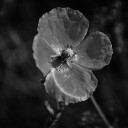


Manual Bicubic Upsampled Image



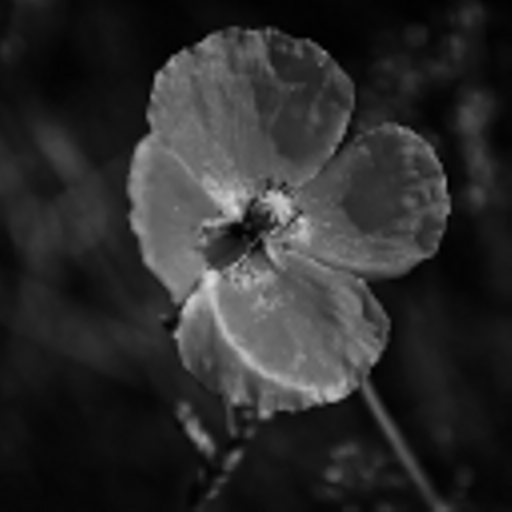


OpenCV Bicubic Upsampled Image



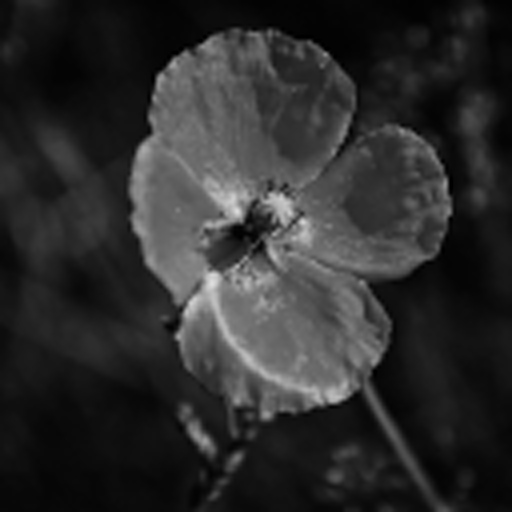

Manually Upsampled image is not same as OpenCV Upsampled image and MSE is 14.87436294555664


In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Cubic function
def cubic(value):
    abs_value = np.abs(value)
    if abs_value <= 1:
        return 1.5 * abs_value**3 - 2.5 * abs_value**2 + 1
    elif abs_value < 2:
        return -0.5 * abs_value**3 + 2.5 * abs_value**2 - 4 * abs_value + 2
    else:
        return 0

# Method for bicubic interpolation for a single pixel (x, y)
def bicubic_interpolate(image, x, y):
    height, width, channels = image.shape
    x0 = int(np.floor(x))
    y0 = int(np.floor(y))
    dx = x - x0
    dy = y - y0

    result = np.zeros(channels)
    for c in range(channels):
        value = 0.0
        for i in range(-1, 3):
            for j in range(-1, 3):
                xi = np.clip(x0 + i, 0, width - 1)
                yi = np.clip(y0 + j, 0, height - 1)
                wx = cubic(i - dx)
                wy = cubic(j - dy)
                value += image[yi, xi, c] * wx * wy
        result[c] = np.clip(value, 0, 255)
    return result

# Method for Upsampling an image by a given scale factor using bicubic interpolation
def upsample_bicubic(image, scale):
    height, width, channels = image.shape
    new_height = height * scale
    new_width = width * scale
    upsampled_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    for y in range(new_height):
        for x in range(new_width):
            src_x = x / scale
            src_y = y / scale
            upsampled_image[y, x] = bicubic_interpolate(image, src_x, src_y)

    return upsampled_image

# Compare two image show the mse value of difference
def verify_result(image1, image2):
    # Compare the shape
    if image1.shape != image2.shape:
        if image1.shape[0] > image2.shape[0] and image1.shape[1] > image2.shape[1]:
            image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))
        else:
            image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    return np.mean((np.array(image1) - np.array(image2)) ** 2)

# Load an image (for example purposes, convert to float32 and normalize)
original_image = cv2.imread('/content/a_1_task_5.png')

# Upsample the image using the manual bicubic interpolation with sample factor as 4
upsampled_image_manual = upsample_bicubic(original_image, 4)

# Clip the values of image array in range of 0-255 then convert data type of array to uint8(unsigned 8 bit integer)
upsampled_image_manual = np.clip(upsampled_image_manual, 0, 255).astype(np.uint8)

# Upsample the image using OpenCV's bicubic interpolation
upsampled_image_opencv = cv2.resize(original_image.astype(np.uint8), None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)

# Display results
print("Original Image\n")
cv2_imshow(original_image.astype(np.uint8))

print("\nManual Bicubic Upsampled Image\n")
cv2_imshow(upsampled_image_manual)

print("\nOpenCV Bicubic Upsampled Image\n")
cv2_imshow(upsampled_image_opencv)

print("\n")
 # Verify result of manually Upsampled image and OpenCV Upsampled image
mse = verify_result(upsampled_image_manual, upsampled_image_opencv)
if mse < 1:
    print(f"Manually Upsampled image is same as OpenCV Upsampled image and MSE is {mse}")
else:
    print(f"Manually Upsampled image is not same as OpenCV Upsampled image and MSE is {mse}")